<a href="https://colab.research.google.com/github/ArtuomMerkulov/ArtuomMerkulov/blob/main/%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D1%86%D0%B8%D1%8F_%D1%81%D0%BA%D1%80%D0%B8%D0%BD%D1%88%D0%BE%D1%82%D0%BE%D0%B2_%D1%8D%D0%BA%D1%80%D0%B0%D0%BD%D0%BE%D0%B2_%D0%BC%D0%BE%D0%B1%D0%B8%D0%BB%D1%8C%D0%BD%D1%8B%D1%85_%D0%B8%D0%B3%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Генерация скриншотов экранов мобильных игр
Для генерации использовал маску в качестве условия


In [2]:
!pip install keras==2.0 -q 
!pip install tensorflow==1.13.2 -q

     |████████████████████████████████| 191 kB 7.3 MB/s 
     |████████████████████████████████| 588.3 MB 20 kB/s 
     |████████████████████████████████| 439 kB 71.6 MB/s 
     |████████████████████████████████| 578.1 MB 8.0 kB/s 
     |████████████████████████████████| 5.9 MB 64.3 MB/s 
     |████████████████████████████████| 578.1 MB 6.6 kB/s 
     |████████████████████████████████| 511.8 MB 27 kB/s 
     |████████████████████████████████| 511.7 MB 31 kB/s 
     |████████████████████████████████| 511.7 MB 202 bytes/s 
     |████████████████████████████████| 498.0 MB 13 kB/s 
     |████████████████████████████████| 498.4 MB 25 kB/s 
     |████████████████████████████████| 498.0 MB 19 kB/s 
     |████████████████████████████████| 498.0 MB 31 kB/s 
     |████████████████████████████████| 497.6 MB 2.0 kB/s 
     |████████████████████████████████| 462 kB 68.6 MB/s 
     |████████████████████████████████| 496.0 MB 12 kB/s 
     |████████████████████████████████| 495.5 MB 18 kB/s 
     |██

In [31]:
import scipy

from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Concatenate, LeakyReLU
from keras.layers import BatchNormalization, Add, add
from keras.layers import UpSampling2D, Conv2D
from keras.applications import vgg19
from keras.utils import plot_model
from keras.utils import plot_model
from tensorflow.python.keras.preprocessing.image import img_to_array, load_img
#from keras.preprocessing.image import img_to_array, load_img
from keras.models import Sequential, Model
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os
import keras.backend as K
from tqdm import tqdm
from tensorflow.python.platform.tf_logging import set_verbosity, FATAL
set_verbosity(FATAL)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '0'

In [32]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
!unrar x '/content/drive/MyDrive/Numpy/Mоbile game loading screen.rar'


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/Numpy/Mоbile game loading screen.rar

Creating    Mоbile game loading screen                                OK
Extracting  Mоbile game loading screen/1010!.jpg                           0%  OK 
Extracting  Mоbile game loading screen/8 Ball pool.jpg                     0%  OK 
Extracting  Mоbile game loading screen/Amaze.jpg                           0%  OK 
Extracting  Mоbile game loading screen/Animal transform race.jpg           1%  OK 
Extracting  Mоbile game loading screen/Ball brick breaker.jpg              1%  OK 
Extracting  Mоbile game loading screen/Beat racing.jpg                     3%  OK 
Extracting  Mоbile game loading screen/Billiards city.jpg                  5%  OK 
Extracting  Mоbile game loading screen/Blob runner 3d.jpg                  5%  OK 
Extracting  Mоbile game loading screen/Bob's 

In [33]:
img_shape = (128, 256, 3) #размер изображения
height = img_shape[0]
width = img_shape[1]

In [34]:
imgs = [] 
for image in sorted(os.listdir('/content/Mоbile game loading screen/')): #проходим по каждому файлу, получив список файлов в папке 
  print(image)
  imgs.append(img_to_array(load_img('/content/Mоbile game loading screen/'+image, target_size=(height,width)))) #загружаем файл, устанавливаем нужный размер и сохраняем в оперативную память, как массив numpy
imgs = np.stack(imgs).astype('uint8') #сохраняем итоговый массив изображений

masks = []
for image in sorted(os.listdir('/content/Mоbile game loading screen/')): #проходим по каждому файлу, получив список файлов в папке 
  masks.append(img_to_array(load_img('/content/Mоbile game loading screen/'+image, target_size=(height,width)))) #загружаем файл, устанавливаем нужный размер и сохраняем в оперативную память, как массив numpy
masks = np.stack(masks).astype('uint8') #сохраняем итоговый массив масок

1010!.jpg
8 Ball pool.jpg
Amaze.jpg
Animal transform race.jpg
Ball brick breaker.jpg
Beat racing.jpg
Billiards city.jpg
Blob runner 3d.jpg
Bob's world.jpg
Body race.jpg
Bottle flip 3d.jpg
Brawl Stars.png
Bridal Rush!.jpg
Bridge race.jpg
Call of duty mobile.jpg
Cannon shot.jpg
Carpet roller - dress and rugs.jpg
Castle clash.png
Cheerleader run 3d.jpg
Clash of clans.jpg
Color crush.jpg
Colour adventure.jpg
Comics Bob.jpg
Cut and paint.jpg
Dancing line origins.jpg
Dancing road.jpg
Delete puzzle.jpg
Draw it story.jpg
Draw joust.jpg
Drop number.jpg
Dunk shot.jpg
Epic race 3d.jpg
Fidget toys 3d.jpg
Fruit Block - puzzle legend.jpg
Fun race 3d.jpg
Galaxy attack alien shooter.jpg
GardenScapes.jpg
Giant rush.jpg
Going balls.jpg
Golf blitz.jpg
Heel master.jpg
Helix stack jump.jpg
Hide 'N seek.jpg
Hit Master 3d.jpg
Hit and knock down.jpg
Home pin - how to loot.jpg
Homescapes.jpeg
Hop Ball 3.jpg
IdleAnts.jpg
Jelly shift.jpg
Johnny Trigger.jpg
Join and clash.jpg
Join and strike.jpg
Kick the Buddy.jp

In [35]:
def build_generator():
    gf = 64 #минимальное число фильтров
    
    def conv2d(layer_input, filters, f_size=4, bn=True): #слой с понижением разрешения (encoder)
        
        d = Conv2D(filters, kernel_size=f_size, strides=2, padding='same')(layer_input) #strides = 2 уменьшает разрешение в 2 раза при padding='same'
        d = LeakyReLU(alpha=0.2)(d)
        if bn:
            d = BatchNormalization(momentum=0.8)(d)
        return d

    def deconv2d(layer_input, skip_input, filters, f_size=4, dropout_rate=0): #слой с повышением разрешения (decoder) принимает на вход предыдущий слой и skip-слой от encoder'а
        u = UpSampling2D(size=2)(layer_input) #увеличивам разрешение в 2 раза
        u = Conv2D(filters, kernel_size=f_size, strides=1, padding='same', activation='relu')(u) #strides=1, padding='same',  поэтому разрешение сохраняется
        if dropout_rate:
            u = Dropout(dropout_rate)(u)
        u = BatchNormalization(momentum=0.8)(u)
        u = Concatenate()([u, skip_input]) #соединяем skip-слой и слой decoder'а
        return u

    d0 = Input(shape=img_shape, name="condition") #входное изображение (условие)

    # Часть encoder'a
    d1 = conv2d(d0, gf, bn=False)
    d2 = conv2d(d1, gf*2)
    d3 = conv2d(d2, gf*4) #чем меньше размер карт активаций
    d4 = conv2d(d3, gf*8) #тем больше должно быть фильтров в сверточном слое
    d5 = conv2d(d4, gf*8)
    d6 = conv2d(d5, gf*8)
    d7 = conv2d(d6, gf*8)

    # Часть decoder'a
    u1 = deconv2d(d7, d6, gf*8)
    u2 = deconv2d(u1, d5, gf*8) 
    u3 = deconv2d(u2, d4, gf*8) #чем больше размер карт активаций
    u4 = deconv2d(u3, d3, gf*4) #тем меньше должно быть фильтров в сверточном слое
    u5 = deconv2d(u4, d2, gf*2)
    u6 = deconv2d(u5, d1, gf)

    u7 = UpSampling2D(size=2)(u6)
    output_img = Conv2D(3, kernel_size=4, strides=1, padding='same', activation='tanh', name='G_output')(u7) 

    return Model(d0, output_img, name="G")

In [36]:
gen = build_generator() #создаем генератор
gen.summary()

Model: "G"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 condition (InputLayer)         [(None, 128, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 64, 128, 64)  3136        ['condition[0][0]']              
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 64, 128, 64)  0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 32, 64, 128)  131200      ['leaky_re_lu[0][0]']            

In [37]:
def build_discriminator():
  
  df = 64 #минимальное число фильтров
  def d_layer(layer_input, filters, f_size=4, bn=True): #слой дискриминатора с понижением разрешения
      
      d = Conv2D(filters, kernel_size=f_size, strides=2, padding='same')(layer_input) #размер карт активаций будет уменьшен в 2 раза, так как strides=2 при padding='same'
      d = LeakyReLU(alpha=0.2)(d)
      if bn:
          d = BatchNormalization(momentum=0.8)(d)
      return d

  image = Input(shape=img_shape, name="real_or_fake_A") #на вход дискриминатору подается либо реальное изображение, либо фейковое
  condition = Input(shape=img_shape, name="condition") #и дополнительно изображение-условие

  combined_imgs = Concatenate(axis=-1)([image, condition]) #объединяем оба входа в 1 слой

  d1 = d_layer(combined_imgs, df, bn=False)
  d2 = d_layer(d1, df*2)
  d3 = d_layer(d2, df*4) #уменьшаем размер карт активации, увеличивая их число
  d4 = d_layer(d3, df*8)

  validity = Conv2D(1, kernel_size=4, strides=1, padding='same', name='D_output', activation='sigmoid')(d4) #на выходе будет двумерный массив, каждый элемент которого определяет, подлинность части изображения (patch GAN)
                                                                                                            #0 отвечает за фейковые изображения, 1 за подлинные, поэтому используем sigmoid

  return Model([image, condition], validity, name='D')

In [38]:
dis = build_discriminator()
dis.summary()

Model: "D"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 real_or_fake_A (InputLayer)    [(None, 128, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 condition (InputLayer)         [(None, 128, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 concatenate_6 (Concatenate)    (None, 128, 256, 6)  0           ['real_or_fake_A[0][0]',         
                                                                  'condition[0][0]']              

In [39]:
def build_vgg():
  #для feature loss создаем vgg модель
  vgg_in = Input(img_shape)
  vgg = vgg19.VGG19(include_top=False, input_shape=img_shape, input_tensor=vgg_in) #скачиваем архитектуру и веса 
  vgg_out = vgg.get_layer('block5_conv4').output #получаем последний сверточный слой
  vgg = Model(vgg_in, vgg_out, name='vgg')
  vgg.trainable = False #модель уже предобучена, поэтому ее необходимо заморозить

  return vgg

In [40]:
vgg = build_vgg()
vgg.summary()

Model: "vgg"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 128, 64)       0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 128, 128)      73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 128, 128)      147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 64, 128)       0       

In [41]:
def build_gan(generator, discriminator, vgg):
  discriminator.trainable = False #замораживаем дискриминатор

  condition = Input(img_shape, name='Condition') #вход изображения-условия
  fake_img = generator(condition) #изображение, полученное от генератора

  fake_features = vgg(fake_img) #карты активации, полученные от фейкового изображения

  fake_validity = discriminator([fake_img, condition]) #соединяем генератор и дискриминатор

  gan = Model(condition, [fake_validity, fake_img, fake_features]) #получаем gan с тремя выходами: первый отвечает за "правдоподобность", второй за изображение от генератора, третий за карты активации

  return gan

In [42]:
dis.output_shape[1:]

(8, 16, 1)

In [43]:
(np.ones((128, *dis.output_shape[1:]))).shape

(128, 8, 16, 1)

In [44]:
def train(generator, discriminator, gan, vgg, imgs, masks, epochs, batch_size):

  for epoch in range(epochs): 
    idx = np.random.choice(imgs.shape[0], imgs.shape[0], replace=False) #перемешиваем индексы, чтобы batch'и всегда были разными

    with tqdm(total=imgs.shape[0]) as pbar: #для отслеживания создаем progressbar
      for batch in range(imgs.shape[0]//batch_size):
        
        #для тренировки дискриминатора применяем label smoothing
        #размерность Y: (размер батча, высота последнего слоя дискриминатора, ширина, 1)
        y_real = np.ones((batch_size, *discriminator.output_shape[1:])) - np.random.random_sample((batch_size, *discriminator.output_shape[1:]))*0.2
        y_fake = np.random.random_sample((batch_size, *discriminator.output_shape[1:]))*0.2

        idx_batch = idx[batch*batch_size:(batch+1)*batch_size] #получаем индексы для одного batch'а

        real_imgs = (imgs[idx_batch]/127.5)-1 #получаем истинные изображения и нормализуем их
        condition = (masks[idx_batch]/127.5)-1 #получаем маски и нормализуем их

        fake_imgs = generator.predict(condition) #генерируем изображения по маскам

        #тренируем дискриминатор       
        d_loss_real = discriminator.train_on_batch([real_imgs, condition], y_real)
        d_loss_fake = discriminator.train_on_batch([fake_imgs, condition], y_fake)
        d_loss_total = 0.5*np.add(d_loss_real, d_loss_fake)
   
        #тренируем генератор
        real_features = vgg.predict(real_imgs)
        y_real = np.ones((batch_size, *discriminator.output_shape[1:]))

        g_loss = gan.train_on_batch(condition, [y_real, real_imgs, real_features])
        pbar.update(batch_size) #обновляем progressbar
        pbar.set_description("Epoch: {}/{}, Discriminator loss: {}, Generator loss:{}".format(epoch+1, epochs, d_loss_total[0], g_loss))

In [45]:
gen = build_generator() #создаем генератор

dis = build_discriminator() #создаем дискриминатор
dis.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-4, beta_1=0.5), metrics=['accuracy'])

vgg = build_vgg() #создаем vgg модель

gan = build_gan(gen, dis, vgg) #создаем gan
gan.compile(loss=['binary_crossentropy', 'mse', 'mse'], loss_weights=[1,100,10], optimizer=Adam(lr=1e-4, beta_1=0.5)) #вклад разницы между пикселями в 10 раз больше, чем вклад от feature loss и в 100 раз больше, чем вклад от GAN

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.


In [46]:
gen.summary()

Model: "G"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 condition (InputLayer)         [(None, 128, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_17 (Conv2D)             (None, 64, 128, 64)  3136        ['condition[0][0]']              
                                                                                                  
 leaky_re_lu_11 (LeakyReLU)     (None, 64, 128, 64)  0           ['conv2d_17[0][0]']              
                                                                                                  
 conv2d_18 (Conv2D)             (None, 32, 64, 128)  131200      ['leaky_re_lu_11[0][0]']         

In [47]:
dis.summary()

Model: "D"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 real_or_fake_A (InputLayer)    [(None, 128, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 condition (InputLayer)         [(None, 128, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 concatenate_13 (Concatenate)   (None, 128, 256, 6)  0           ['real_or_fake_A[0][0]',         
                                                                  'condition[0][0]']              

In [48]:
vgg.summary()

Model: "vgg"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 128, 64)       0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 128, 128)      73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 128, 128)      147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 64, 128)       0       

In [56]:
train(gen, dis, gan, vgg, imgs, masks, 99, 100) #тренируем модель

  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 103ms/step


Epoch: 1/99, Discriminator loss: 0.6495406031608582, Generator loss:[3.9037039279937744, 1.199299931526184, 0.024991970509290695, 0.020520711317658424]: 100%|██████████| 100/100 [00:05<00:00, 19.58it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 104ms/step


Epoch: 2/99, Discriminator loss: 0.7199539840221405, Generator loss:[3.6222469806671143, 0.980134904384613, 0.024377144873142242, 0.020439743995666504]: 100%|██████████| 100/100 [00:04<00:00, 21.56it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 104ms/step


Epoch: 3/99, Discriminator loss: 0.6112990379333496, Generator loss:[3.57588529586792, 0.9622830152511597, 0.02410714142024517, 0.020288800820708275]: 100%|██████████| 100/100 [00:04<00:00, 22.83it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 104ms/step


Epoch: 4/99, Discriminator loss: 0.6313011646270752, Generator loss:[3.4781429767608643, 0.8694225549697876, 0.024068553000688553, 0.020186491310596466]: 100%|██████████| 100/100 [00:04<00:00, 22.28it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 105ms/step


Epoch: 5/99, Discriminator loss: 0.6039506494998932, Generator loss:[3.5058834552764893, 0.908003032207489, 0.02397298254072666, 0.020058203488588333]: 100%|██████████| 100/100 [00:04<00:00, 20.96it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 104ms/step


Epoch: 6/99, Discriminator loss: 0.5951606631278992, Generator loss:[3.481067419052124, 0.8618613481521606, 0.02418837510049343, 0.02003687620162964]: 100%|██████████| 100/100 [00:04<00:00, 21.01it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 105ms/step


Epoch: 7/99, Discriminator loss: 0.5787728428840637, Generator loss:[3.528346061706543, 0.888018012046814, 0.024405838921666145, 0.01997443288564682]: 100%|██████████| 100/100 [00:04<00:00, 22.25it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 105ms/step


Epoch: 8/99, Discriminator loss: 0.588447242975235, Generator loss:[3.4670803546905518, 0.8724678158760071, 0.023960206657648087, 0.01985918916761875]: 100%|██████████| 100/100 [00:04<00:00, 22.75it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 105ms/step


Epoch: 9/99, Discriminator loss: 0.5787462592124939, Generator loss:[3.4616854190826416, 0.8924201130867004, 0.02372042089700699, 0.019722329452633858]: 100%|██████████| 100/100 [00:04<00:00, 21.29it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 107ms/step


Epoch: 10/99, Discriminator loss: 0.5830864608287811, Generator loss:[3.4501280784606934, 0.8870552182197571, 0.02366369031369686, 0.019670404493808746]: 100%|██████████| 100/100 [00:04<00:00, 22.16it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 106ms/step


Epoch: 11/99, Discriminator loss: 0.5886769592761993, Generator loss:[3.4841971397399902, 0.9284403920173645, 0.023600734770298004, 0.01956832967698574]: 100%|██████████| 100/100 [00:04<00:00, 22.51it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 105ms/step


Epoch: 12/99, Discriminator loss: 0.6139492392539978, Generator loss:[3.461850166320801, 0.9146305918693542, 0.023521466180682182, 0.01950732246041298]: 100%|██████████| 100/100 [00:04<00:00, 22.58it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 106ms/step


Epoch: 13/99, Discriminator loss: 0.6214083433151245, Generator loss:[3.505441188812256, 0.9674270749092102, 0.023442506790161133, 0.019376374781131744]: 100%|██████████| 100/100 [00:04<00:00, 20.91it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 106ms/step


Epoch: 14/99, Discriminator loss: 0.646785169839859, Generator loss:[3.663100004196167, 1.1250314712524414, 0.02344745211303234, 0.019332345575094223]: 100%|██████████| 100/100 [00:04<00:00, 20.76it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 106ms/step


Epoch: 15/99, Discriminator loss: 0.671120285987854, Generator loss:[3.5143723487854004, 0.9583123922348022, 0.02362973242998123, 0.019308628514409065]: 100%|██████████| 100/100 [00:04<00:00, 22.42it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 105ms/step


Epoch: 16/99, Discriminator loss: 0.6047716736793518, Generator loss:[3.4197874069213867, 0.8438678979873657, 0.023848235607147217, 0.01910957135260105]: 100%|██████████| 100/100 [00:04<00:00, 20.75it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 106ms/step


Epoch: 17/99, Discriminator loss: 0.5976806282997131, Generator loss:[3.499321699142456, 0.9600598216056824, 0.023482978343963623, 0.019096363335847855]: 100%|██████████| 100/100 [00:04<00:00, 21.78it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 108ms/step


Epoch: 18/99, Discriminator loss: 0.6136932373046875, Generator loss:[3.3909385204315186, 0.8665754795074463, 0.02334212139248848, 0.019015071913599968]: 100%|██████████| 100/100 [00:04<00:00, 21.08it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 108ms/step


Epoch: 19/99, Discriminator loss: 0.5960163176059723, Generator loss:[3.4016165733337402, 0.8968105912208557, 0.02316223457455635, 0.018858276307582855]: 100%|██████████| 100/100 [00:04<00:00, 22.15it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 107ms/step


Epoch: 20/99, Discriminator loss: 0.5793469846248627, Generator loss:[3.3841848373413086, 0.8914784789085388, 0.02304837852716446, 0.018786828964948654]: 100%|██████████| 100/100 [00:04<00:00, 20.64it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 107ms/step


Epoch: 21/99, Discriminator loss: 0.5780526399612427, Generator loss:[3.380194902420044, 0.894920289516449, 0.02297920547425747, 0.01873541623353958]: 100%|██████████| 100/100 [00:04<00:00, 21.71it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 108ms/step


Epoch: 22/99, Discriminator loss: 0.576876699924469, Generator loss:[3.372501850128174, 0.8878915309906006, 0.02297935076057911, 0.01866752654314041]: 100%|██████████| 100/100 [00:04<00:00, 20.70it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 107ms/step


Epoch: 23/99, Discriminator loss: 0.5811696350574493, Generator loss:[3.425175666809082, 0.9221435785293579, 0.0231678057461977, 0.01862517185509205]: 100%|██████████| 100/100 [00:04<00:00, 22.07it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 108ms/step


Epoch: 24/99, Discriminator loss: 0.573024183511734, Generator loss:[3.474525213241577, 0.9162742495536804, 0.02371617965400219, 0.01866328716278076]: 100%|██████████| 100/100 [00:04<00:00, 21.96it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 107ms/step


Epoch: 25/99, Discriminator loss: 0.6053905785083771, Generator loss:[3.431382656097412, 0.9338531494140625, 0.02312028408050537, 0.018550105392932892]: 100%|██████████| 100/100 [00:04<00:00, 20.86it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 108ms/step


Epoch: 26/99, Discriminator loss: 0.6360315978527069, Generator loss:[3.3947184085845947, 0.9276171922683716, 0.022829407826066017, 0.018416045233607292]: 100%|██████████| 100/100 [00:04<00:00, 21.56it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 108ms/step


Epoch: 27/99, Discriminator loss: 0.5974400639533997, Generator loss:[3.4223523139953613, 0.9597740769386292, 0.0227937214076519, 0.018320616334676743]: 100%|██████████| 100/100 [00:04<00:00, 21.68it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 108ms/step


Epoch: 28/99, Discriminator loss: 0.6365247070789337, Generator loss:[3.405379295349121, 0.9233845472335815, 0.022992469370365143, 0.018274787813425064]: 100%|██████████| 100/100 [00:04<00:00, 21.97it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 108ms/step


Epoch: 29/99, Discriminator loss: 0.5751127600669861, Generator loss:[3.436642646789551, 0.9172375202178955, 0.023381022736430168, 0.018130287528038025]: 100%|██████████| 100/100 [00:07<00:00, 13.83it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 108ms/step


Epoch: 30/99, Discriminator loss: 0.5847109854221344, Generator loss:[3.301435947418213, 0.8690425157546997, 0.02252018265426159, 0.01803751476109028]: 100%|██████████| 100/100 [00:05<00:00, 19.04it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 112ms/step


Epoch: 31/99, Discriminator loss: 0.5755462348461151, Generator loss:[3.373173713684082, 0.9465954303741455, 0.022468464449048042, 0.017973193898797035]: 100%|██████████| 100/100 [00:05<00:00, 19.79it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 109ms/step


Epoch: 32/99, Discriminator loss: 0.5941801369190216, Generator loss:[3.3250839710235596, 0.8948126435279846, 0.02251657284796238, 0.01786140725016594]: 100%|██████████| 100/100 [00:04<00:00, 20.45it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 109ms/step


Epoch: 33/99, Discriminator loss: 0.6247782707214355, Generator loss:[3.4796032905578613, 1.031266689300537, 0.022698383778333664, 0.017849832773208618]: 100%|██████████| 100/100 [00:04<00:00, 21.28it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 109ms/step


Epoch: 34/99, Discriminator loss: 0.6123135387897491, Generator loss:[3.3882052898406982, 0.9142128229141235, 0.022953493520617485, 0.017864305526018143]: 100%|██████████| 100/100 [00:04<00:00, 20.38it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 109ms/step


Epoch: 35/99, Discriminator loss: 0.608613133430481, Generator loss:[3.3117122650146484, 0.8886113166809082, 0.022458529099822044, 0.01772480458021164]: 100%|██████████| 100/100 [00:04<00:00, 21.30it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 110ms/step


Epoch: 36/99, Discriminator loss: 0.5747496485710144, Generator loss:[3.320413827896118, 0.9141542315483093, 0.02230064384639263, 0.017619505524635315]: 100%|██████████| 100/100 [00:04<00:00, 21.19it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 111ms/step


Epoch: 37/99, Discriminator loss: 0.558682918548584, Generator loss:[3.3354408740997314, 0.9223753213882446, 0.022374998778104782, 0.017556549981236458]: 100%|██████████| 100/100 [00:04<00:00, 21.35it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 109ms/step


Epoch: 38/99, Discriminator loss: 0.5737349390983582, Generator loss:[3.2928175926208496, 0.8891478776931763, 0.022288132458925247, 0.01748569682240486]: 100%|██████████| 100/100 [00:04<00:00, 21.39it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 110ms/step


Epoch: 39/99, Discriminator loss: 0.5534271597862244, Generator loss:[3.321528673171997, 0.9266788959503174, 0.02221832238137722, 0.017301755025982857]: 100%|██████████| 100/100 [00:04<00:00, 21.20it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 109ms/step


Epoch: 40/99, Discriminator loss: 0.5673394501209259, Generator loss:[3.2604544162750244, 0.8870222568511963, 0.022007925435900688, 0.01726396381855011]: 100%|██████████| 100/100 [00:04<00:00, 21.75it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 108ms/step


Epoch: 41/99, Discriminator loss: 0.6064433455467224, Generator loss:[3.346763849258423, 0.9844740033149719, 0.02191217429935932, 0.017107242718338966]: 100%|██████████| 100/100 [00:05<00:00, 19.47it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 109ms/step


Epoch: 42/99, Discriminator loss: 0.6479901969432831, Generator loss:[3.381100654602051, 1.0214163064956665, 0.02188534289598465, 0.017115045338869095]: 100%|██████████| 100/100 [00:07<00:00, 13.19it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 109ms/step


Epoch: 43/99, Discriminator loss: 0.7482810318470001, Generator loss:[3.551387071609497, 1.1875089406967163, 0.021945348009467125, 0.016934312880039215]: 100%|██████████| 100/100 [00:04<00:00, 21.70it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 110ms/step


Epoch: 44/99, Discriminator loss: 0.6793571412563324, Generator loss:[3.3352279663085938, 0.9782480597496033, 0.02187792956829071, 0.016918687149882317]: 100%|██████████| 100/100 [00:04<00:00, 21.51it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 108ms/step


Epoch: 45/99, Discriminator loss: 0.6315944790840149, Generator loss:[3.3184854984283447, 0.9755668640136719, 0.021742723882198334, 0.016864633187651634]: 100%|██████████| 100/100 [00:04<00:00, 20.83it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 108ms/step


Epoch: 46/99, Discriminator loss: 0.5921282470226288, Generator loss:[3.2574715614318848, 0.9029838442802429, 0.02185608074069023, 0.016887960955500603]: 100%|██████████| 100/100 [00:04<00:00, 21.52it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 111ms/step


Epoch: 47/99, Discriminator loss: 0.57164466381073, Generator loss:[3.250201463699341, 0.8822268843650818, 0.022002115845680237, 0.016776299104094505]: 100%|██████████| 100/100 [00:04<00:00, 21.51it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 110ms/step


Epoch: 48/99, Discriminator loss: 0.5492585301399231, Generator loss:[3.2959423065185547, 0.877297580242157, 0.022504696622490883, 0.016817506402730942]: 100%|██████████| 100/100 [00:04<00:00, 21.88it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 109ms/step


Epoch: 49/99, Discriminator loss: 0.5486510992050171, Generator loss:[3.225273847579956, 0.89056795835495, 0.021686725318431854, 0.016603320837020874]: 100%|██████████| 100/100 [00:04<00:00, 21.74it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 109ms/step


Epoch: 50/99, Discriminator loss: 0.553782045841217, Generator loss:[3.2150025367736816, 0.8938469886779785, 0.021556291729211807, 0.016552608460187912]: 100%|██████████| 100/100 [00:04<00:00, 20.59it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 110ms/step


Epoch: 51/99, Discriminator loss: 0.5698908567428589, Generator loss:[3.246426582336426, 0.9306741952896118, 0.021505407989025116, 0.016521157696843147]: 100%|██████████| 100/100 [00:04<00:00, 20.68it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 110ms/step


Epoch: 52/99, Discriminator loss: 0.6097011864185333, Generator loss:[3.1925458908081055, 0.8941417932510376, 0.021358057856559753, 0.016259806230664253]: 100%|██████████| 100/100 [00:04<00:00, 20.51it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 110ms/step


Epoch: 53/99, Discriminator loss: 0.6099444329738617, Generator loss:[3.233656883239746, 0.9330493211746216, 0.0213836170732975, 0.016224564984440804]: 100%|██████████| 100/100 [00:04<00:00, 21.36it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 110ms/step


Epoch: 54/99, Discriminator loss: 0.5596303939819336, Generator loss:[3.168280839920044, 0.8840345740318298, 0.02122776210308075, 0.01614701747894287]: 100%|██████████| 100/100 [00:04<00:00, 20.93it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 110ms/step


Epoch: 55/99, Discriminator loss: 0.5578780174255371, Generator loss:[3.174867630004883, 0.8996521234512329, 0.02114400453865528, 0.01608152687549591]: 100%|██████████| 100/100 [00:04<00:00, 20.29it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 111ms/step


Epoch: 56/99, Discriminator loss: 0.5464634597301483, Generator loss:[3.1833510398864746, 0.9173648953437805, 0.021062495186924934, 0.01597365364432335]: 100%|██████████| 100/100 [00:04<00:00, 20.52it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 109ms/step


Epoch: 57/99, Discriminator loss: 0.5411001741886139, Generator loss:[3.1758594512939453, 0.908202052116394, 0.02107972651720047, 0.015968453139066696]: 100%|██████████| 100/100 [00:04<00:00, 21.68it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 110ms/step


Epoch: 58/99, Discriminator loss: 0.5402773022651672, Generator loss:[3.162071943283081, 0.8940263986587524, 0.021095113828778267, 0.015853406861424446]: 100%|██████████| 100/100 [00:04<00:00, 21.23it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 109ms/step


Epoch: 59/99, Discriminator loss: 0.540169894695282, Generator loss:[3.237788200378418, 0.9322468638420105, 0.021462982520461082, 0.015924302861094475]: 100%|██████████| 100/100 [00:04<00:00, 20.07it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 109ms/step


Epoch: 60/99, Discriminator loss: 0.5458380877971649, Generator loss:[3.3134098052978516, 0.9516050815582275, 0.022026993334293365, 0.01591053046286106]: 100%|██████████| 100/100 [00:04<00:00, 21.45it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 109ms/step


Epoch: 61/99, Discriminator loss: 0.5637040734291077, Generator loss:[3.2171337604522705, 0.9371501803398132, 0.02121780812740326, 0.015820255503058434]: 100%|██████████| 100/100 [00:04<00:00, 21.34it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 111ms/step


Epoch: 62/99, Discriminator loss: 0.603185772895813, Generator loss:[3.3055906295776367, 1.0488569736480713, 0.020996926352381706, 0.015704117715358734]: 100%|██████████| 100/100 [00:04<00:00, 20.48it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 110ms/step


Epoch: 63/99, Discriminator loss: 0.6267324090003967, Generator loss:[3.126499891281128, 0.8777179718017578, 0.020930126309394836, 0.01557694561779499]: 100%|██████████| 100/100 [00:04<00:00, 20.17it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 110ms/step


Epoch: 64/99, Discriminator loss: 0.5726334452629089, Generator loss:[3.127497673034668, 0.8880679607391357, 0.02084527537226677, 0.015490226447582245]: 100%|██████████| 100/100 [00:04<00:00, 20.54it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 111ms/step


Epoch: 65/99, Discriminator loss: 0.5617761015892029, Generator loss:[3.245333194732666, 1.001662015914917, 0.020894477143883705, 0.015422348864376545]: 100%|██████████| 100/100 [00:04<00:00, 20.52it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 111ms/step


Epoch: 66/99, Discriminator loss: 0.5595290064811707, Generator loss:[3.156704902648926, 0.8936783075332642, 0.021074892953038216, 0.015553724020719528]: 100%|██████████| 100/100 [00:05<00:00, 18.65it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 110ms/step


Epoch: 67/99, Discriminator loss: 0.5160408169031143, Generator loss:[3.166781425476074, 0.8902398943901062, 0.021231256425380707, 0.015341587364673615]: 100%|██████████| 100/100 [00:04<00:00, 20.67it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 111ms/step


Epoch: 68/99, Discriminator loss: 0.5216014385223389, Generator loss:[3.1169843673706055, 0.9042791724205017, 0.020605409517884254, 0.015216432511806488]: 100%|██████████| 100/100 [00:04<00:00, 20.30it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 110ms/step


Epoch: 69/99, Discriminator loss: 0.5033605545759201, Generator loss:[3.098836898803711, 0.8830509185791016, 0.020638957619667053, 0.015189018100500107]: 100%|██████████| 100/100 [00:04<00:00, 21.28it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 109ms/step


Epoch: 70/99, Discriminator loss: 0.5120110958814621, Generator loss:[3.1223878860473633, 0.9055128693580627, 0.020646367222070694, 0.015223870053887367]: 100%|██████████| 100/100 [00:04<00:00, 21.68it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 109ms/step


Epoch: 71/99, Discriminator loss: 0.50131955742836, Generator loss:[3.144912004470825, 0.8981262445449829, 0.020949484780430794, 0.015183704905211926]: 100%|██████████| 100/100 [00:04<00:00, 21.65it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 111ms/step


Epoch: 72/99, Discriminator loss: 0.5265679061412811, Generator loss:[3.1462061405181885, 0.9271637797355652, 0.020676271989941597, 0.015141499228775501]: 100%|██████████| 100/100 [00:06<00:00, 14.29it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 110ms/step


Epoch: 73/99, Discriminator loss: 0.5650302171707153, Generator loss:[3.1660337448120117, 0.9517227411270142, 0.02064516581594944, 0.014979450963437557]: 100%|██████████| 100/100 [00:04<00:00, 21.24it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 111ms/step


Epoch: 74/99, Discriminator loss: 0.6334329843521118, Generator loss:[3.199530601501465, 0.9886134266853333, 0.02062329836189747, 0.014858735725283623]: 100%|██████████| 100/100 [00:04<00:00, 20.60it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 109ms/step


Epoch: 75/99, Discriminator loss: 0.7678944766521454, Generator loss:[3.562617778778076, 1.3808709383010864, 0.02034689486026764, 0.014705761335790157]: 100%|██████████| 100/100 [00:04<00:00, 21.69it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 110ms/step


Epoch: 76/99, Discriminator loss: 0.758517324924469, Generator loss:[3.2773494720458984, 1.1111781597137451, 0.020199110731482506, 0.0146260354667902]: 100%|██████████| 100/100 [00:04<00:00, 21.30it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 110ms/step


Epoch: 77/99, Discriminator loss: 0.5985029935836792, Generator loss:[3.116461992263794, 0.8634419441223145, 0.021028518676757812, 0.015016832388937473]: 100%|██████████| 100/100 [00:04<00:00, 21.60it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 111ms/step


Epoch: 78/99, Discriminator loss: 0.5568139255046844, Generator loss:[3.1983649730682373, 0.9249456524848938, 0.02126307785511017, 0.014711163938045502]: 100%|██████████| 100/100 [00:04<00:00, 20.51it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 110ms/step


Epoch: 79/99, Discriminator loss: 0.5211315900087357, Generator loss:[3.0643677711486816, 0.8559960722923279, 0.02060631290078163, 0.014774048700928688]: 100%|██████████| 100/100 [00:04<00:00, 20.35it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 110ms/step


Epoch: 80/99, Discriminator loss: 0.5079172998666763, Generator loss:[3.106759548187256, 0.9440544247627258, 0.020168256014585495, 0.014587972313165665]: 100%|██████████| 100/100 [00:04<00:00, 21.29it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 111ms/step


Epoch: 81/99, Discriminator loss: 0.5040619820356369, Generator loss:[3.042799472808838, 0.857196033000946, 0.020405011251568794, 0.014510196633636951]: 100%|██████████| 100/100 [00:04<00:00, 21.76it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 109ms/step


Epoch: 82/99, Discriminator loss: 0.5053929686546326, Generator loss:[3.1230788230895996, 0.9661611914634705, 0.020134098827838898, 0.014350793324410915]: 100%|██████████| 100/100 [00:04<00:00, 20.36it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 109ms/step


Epoch: 83/99, Discriminator loss: 0.5149806439876556, Generator loss:[3.0541722774505615, 0.8964759707450867, 0.020147230476140976, 0.014297327026724815]: 100%|██████████| 100/100 [00:04<00:00, 21.55it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 110ms/step


Epoch: 84/99, Discriminator loss: 0.5033915787935257, Generator loss:[3.122469186782837, 0.9488336443901062, 0.02029450237751007, 0.01441853679716587]: 100%|██████████| 100/100 [00:04<00:00, 20.79it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 110ms/step


Epoch: 85/99, Discriminator loss: 0.5104685425758362, Generator loss:[3.055610418319702, 0.901366114616394, 0.02012316882610321, 0.014192738570272923]: 100%|██████████| 100/100 [00:04<00:00, 21.69it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 111ms/step


Epoch: 86/99, Discriminator loss: 0.5422171652317047, Generator loss:[3.0888030529022217, 0.9477462768554688, 0.01999949850142002, 0.014110689051449299]: 100%|██████████| 100/100 [00:04<00:00, 20.23it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 110ms/step


Epoch: 87/99, Discriminator loss: 0.5275806784629822, Generator loss:[3.151088237762451, 0.9957953095436096, 0.020141221582889557, 0.014117074199020863]: 100%|██████████| 100/100 [00:04<00:00, 21.51it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 110ms/step


Epoch: 88/99, Discriminator loss: 0.5339182913303375, Generator loss:[3.070272922515869, 0.9354209899902344, 0.01994258724153042, 0.014059271663427353]: 100%|██████████| 100/100 [00:04<00:00, 21.20it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 110ms/step


Epoch: 89/99, Discriminator loss: 0.5134073197841644, Generator loss:[3.096583843231201, 0.9738404154777527, 0.01983790472149849, 0.013895297423005104]: 100%|██████████| 100/100 [00:04<00:00, 21.35it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 110ms/step


Epoch: 90/99, Discriminator loss: 0.5155374705791473, Generator loss:[3.029573678970337, 0.9221782684326172, 0.019688574597239494, 0.013853807002305984]: 100%|██████████| 100/100 [00:04<00:00, 20.57it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 110ms/step


Epoch: 91/99, Discriminator loss: 0.51667919754982, Generator loss:[3.0199692249298096, 0.9114709496498108, 0.019708707928657532, 0.013762766495347023]: 100%|██████████| 100/100 [00:04<00:00, 21.31it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 111ms/step


Epoch: 92/99, Discriminator loss: 0.5780608355998993, Generator loss:[3.0598971843719482, 0.966401994228363, 0.019572103396058083, 0.01362848561257124]: 100%|██████████| 100/100 [00:04<00:00, 21.59it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 111ms/step


Epoch: 93/99, Discriminator loss: 0.5421989262104034, Generator loss:[2.9484620094299316, 0.864229142665863, 0.019481735303997993, 0.013605914078652859]: 100%|██████████| 100/100 [00:04<00:00, 20.33it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 112ms/step


Epoch: 94/99, Discriminator loss: 0.533819854259491, Generator loss:[3.048509120941162, 0.946423351764679, 0.019658686593174934, 0.01362170185893774]: 100%|██████████| 100/100 [00:04<00:00, 20.51it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 110ms/step


Epoch: 95/99, Discriminator loss: 0.5516567230224609, Generator loss:[3.028160810470581, 0.9265035390853882, 0.019654251635074615, 0.013623193837702274]: 100%|██████████| 100/100 [00:04<00:00, 20.26it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 110ms/step


Epoch: 96/99, Discriminator loss: 0.5383005440235138, Generator loss:[3.0662431716918945, 0.9813179969787598, 0.01948920451104641, 0.013600463978946209]: 100%|██████████| 100/100 [00:04<00:00, 20.61it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 110ms/step


Epoch: 97/99, Discriminator loss: 0.5264228582382202, Generator loss:[2.9604527950286865, 0.8885742425918579, 0.019379252567887306, 0.01339535228908062]: 100%|██████████| 100/100 [00:04<00:00, 21.58it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 111ms/step


Epoch: 98/99, Discriminator loss: 0.6830814778804779, Generator loss:[3.180699348449707, 1.0993775129318237, 0.019471293315291405, 0.013419251888990402]: 100%|██████████| 100/100 [00:04<00:00, 20.58it/s]
  0%|          | 0/100 [00:00<?, ?it/s]

4/4 [==============================] - 0s 110ms/step


Epoch: 99/99, Discriminator loss: 0.5818499475717545, Generator loss:[3.04010009765625, 0.9429940581321716, 0.019635209813714027, 0.013358504511415958]: 100%|██████████| 100/100 [00:04<00:00, 21.33it/s]


In [101]:
def sample_image(generator, imgs, masks, idx): 
    fig, ax = plt.subplots(1, 3, figsize=(15,5))

    ax[0].imshow(masks[idx]) 
    #ax[0].set_title()
    
    condition = masks[idx]/150.5-1
    generated = (generator.predict(condition[None])+1)*150.5 

    ax[1].imshow(generated[0].astype('uint8')) #показываем сгенерированное изображение
    ax[1].set_title('сгенерированное изображение')

    ax[2].imshow(imgs[idx]) #показываем исходное изображение
    ax[2].set_title('реальное изображение')

1/1 [==============================] - 0s 17ms/step


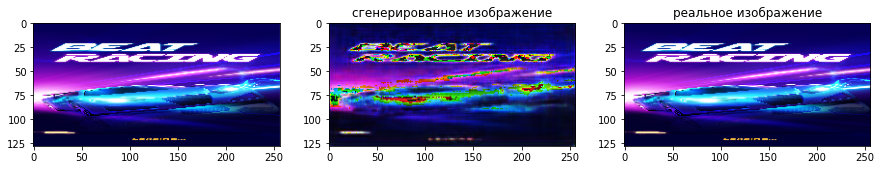

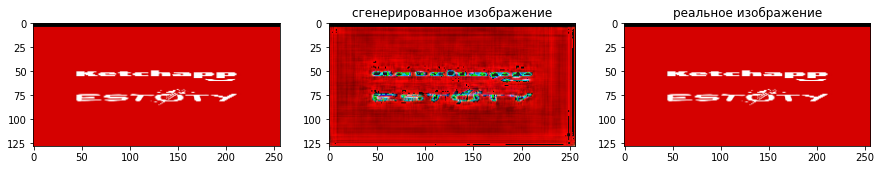

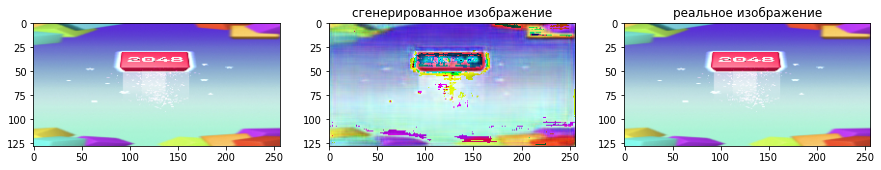

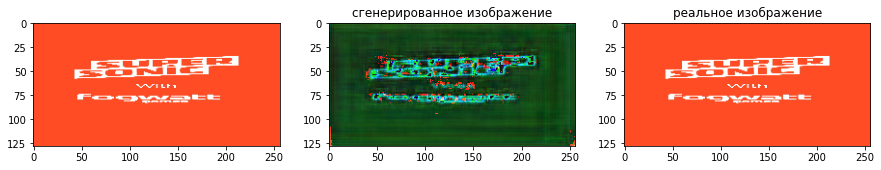

In [114]:
for i in [5,30,55,80]:
   sample_image(gen, imgs, masks, i)

In [120]:
A = np.matrix(np.random.randint(-5,5,(5,10)))
X = np.matrix(np.random.randint(5,10,(5,10)))
C = np.matrix(np.random.randint(10,15,(5,10)))
AX = np.dot(A, X.T)
Y = AX.dot(C)
Y.shape

(5, 10)

In [121]:
Y=A@X.T@C
Y.shape

(5, 10)